This approach is similar to the main one in `CQF.ipynb`, but the slopes are set by the system, and users can only choose their `limit`.

Using `get_payouts_symmetrical`, the slopes depend on the order of users' contributions. It's advantage, is that it never saturates, and the pot can grow indefinitely. It also has a really nice graphical representation (TODO draw it). It's disadvantage, is that it encourages strategic thinking about the order of contributions.

Using `get_payouts_ordered`, the slopes are the same for all users, so there is less strategic thinking, but the pot saturates at some point. Also we lose the nice graphical representation.

Both of those approaches have the advantage over the main one, that payouts depend on the maximal payouts each user announced, so it's all simpler, and we don't have to iterate to find a stable solution.

In [137]:
import numpy as np
from matplotlib import pyplot as plt

# from autograd import grad
# from autograd import elementwise_grad as egrad

In [79]:
# pledges list is ordered by the time those pledges were placed
# so the the first ones, appear on the right of the image
# in the symmetrical case, the order has no effect

# def get_payouts_ordered(pledges):
#     radiuses = np.sqrt(pledges) # * np.sqrt(4 / np.pi)
#     height = sum(radiuses)
#     offsets = np.cumsum(radiuses)
#     slopes = height / offsets
#     angles = np.arctan(slopes)
#     saturations = angles / (np.pi / 2)
#     payouts = saturations * pledges
#     return payouts

In [80]:
def get_payouts_symmetrical(pledges, target=1):
    radiuses = np.sqrt(pledges) # * np.sqrt(4 / np.pi)
    height = sum(radiuses)
    slope = height / target
    angle = np.arctan(slope)
    saturation = angle / (np.pi / 2)
    payouts = saturation * np.array(pledges)
    return payouts

In [81]:
# some tests

def test_symmetrical_target():
    pledges = [4,9,1]
    target = 6
    payouts = get_payouts_symmetrical(pledges, target=target)
    assert list(payouts) == [2, 4.5, 0.5]
    
    
def test_symmetry():
    pledges = [4,9,1]
    payouts1 = get_payouts_symmetrical(pledges)
    pledges = [1,4,9]
    payouts2 = get_payouts_symmetrical(pledges)
    assert sum(payouts1) == sum(payouts2)

test_symmetrical_target()
test_symmetry()

In [82]:
# def instant_leverage(pledges, new_pledge):
#     pledges = pledges.copy()
#     old_sum = sum(get_payouts_ordered(pledges))
    
#     pledges.append(new_pledge)
#     payouts = get_payouts_ordered(pledges)
#     new_sum = sum(payouts)
    
#     leverage = (new_sum - old_sum) / payouts[-1]
#     return leverage

In [103]:
# find the best pledge for a desired leverage

def add_pledge_given_desired_leverage(pledges, target, desired_leverage):
    epsilon = 0.01
    # pledges = original_pledges.copy()
    pledges.append(0)

    while True:
        old_payouts = get_payouts_symmetrical(pledges, target)
        pledges[-1] += epsilon
        new_payouts = get_payouts_symmetrical(pledges, target)

        old_total_payout = sum(old_payouts)
        new_total_payout = sum(new_payouts)
        old_personal_payout = old_payouts[-1]
        new_personal_payout = new_payouts[-1]

        leverage = (new_total_payout - old_total_payout) / (new_personal_payout - old_personal_payout)
        if leverage < desired_leverage:
            break

#     print(f"{leverage = }")
#     print(f"{pledges = }")
#     print(f"{new_total_payout = }")
#     print(f"{new_personal_payout = }")

saturation1 = 0.3859251071323899
saturation2 = 0.41941396856532603
total_payout1 = 3.5119184749047494
total_payout2 = 4.567418117676402
total payout difference:  1.0554996427716525


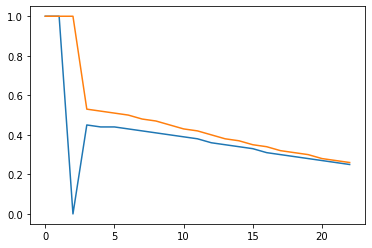

In [195]:
pledges1 = [1, 1, 0]
pledges2 = [1, 1, 1]
target = 20
leverages = [1.5] * 20

def add_pledges_given_desired_leverages_list(pledges, target, leverages):
    for leverage in leverages:
        add_pledge_given_desired_leverage(pledges, target, leverage)
        total_payout = sum(get_payouts_symmetrical(pledges1, target))
        # print(f"{total_payout = :.2f}       {pledges1[-1] = :.2f}")
    payout = get_payouts_symmetrical(pledges, target)
    total_payout = sum(payout)
    saturation = payout[0] / pledges[0]
    return pledges, total_payout, saturation

pledges1, total_payout1, saturation1 = add_pledges_given_desired_leverages_list(pledges1, target, leverages)
pledges2, total_payout2, saturation2 = add_pledges_given_desired_leverages_list(pledges2, target, leverages)
    
print(f"{saturation1 = }")
print(f"{saturation2 = }")
print(f"{total_payout1 = }")
print(f"{total_payout2 = }")
print("total payout difference: ", total_payout2 - total_payout1)
plt.plot(pledges1)
plt.plot(pledges2)

In [ ]:
# high target, on one hand reduces saturation
# but on the other, it reduces the influence of a new pledge

In [ ]:
# symmetrical example is simpler to analyze, because people don't get so strategic about the order
# but it is scale dependent (contrary to the ordered version)
# so optimal target needs to be predicted in advance
# this actually may be good sometimes, so that some fund doesn't spiral beyond necessity